# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('./heart.csv')
df.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
print("Dataset Info:")
print(df.info())
print("\nDataset Summary:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Dataset Summary:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.39

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


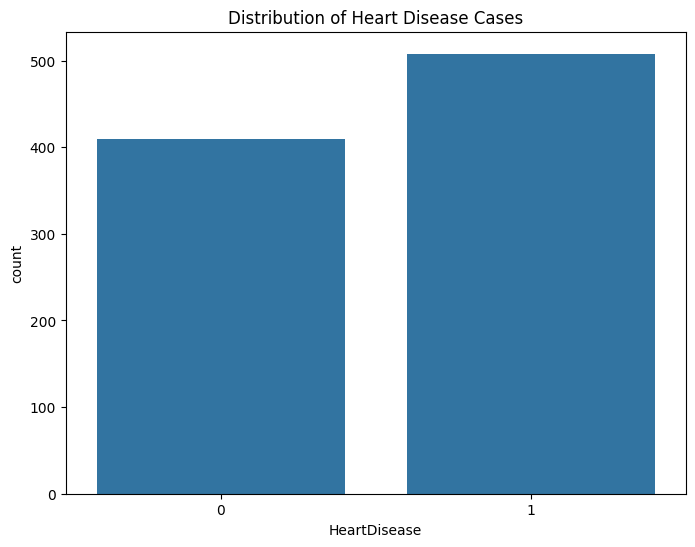

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease Cases')
plt.show()

In [7]:
balance = df['HeartDisease'].value_counts(normalize=True)
print("\nClass Distribution:")
print(balance)


Class Distribution:
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [8]:
#! Convert categorical columns to numeric using one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0    False   True              False  ...              False   
1     True  False              False  ...               True   
2    False   True              False  ...              False   
3     True  False               True  ...              False   
4    False   True              False  ...               True   
..     ...    ...                ...  ...                ...   
913  False   True              False  ...              False   
914  False   True               True  ...              False   
915  False   True               True  ...              False   
916   True  False              False  ...              False   
917  False   True              False  ...               True   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0               False           False               True          False   
1               False           False               True          False   
2               False           False              False           True   
3               False           False               True          False   
4               False           False               True          False   
..                ...             ...                ...            ...   
913              True           False               True          False   
914             False           False               True          False   
915             False           False               True          False   
916             False            True              False          False   
917             False           False               True          False   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                True             False          False          False   
1                True             False          False           True   
2                True             False          False          False   
3               False              True          False           True   
4                True             False          False          False   
..                ...               ...            ...            ...   
913              True             False          False           True   
914              True             False          False           True   
915             False              True          False           True   
916              True             False          False           True   
917              True             False          False          False   

     ST_Slope_Up  
0           True  
1          False  
2           True  
3          False  
4           True  
..           ...  
913        False  
914        False  
915        False  
916        False  
917         True  

[918 rows x 21 columns]

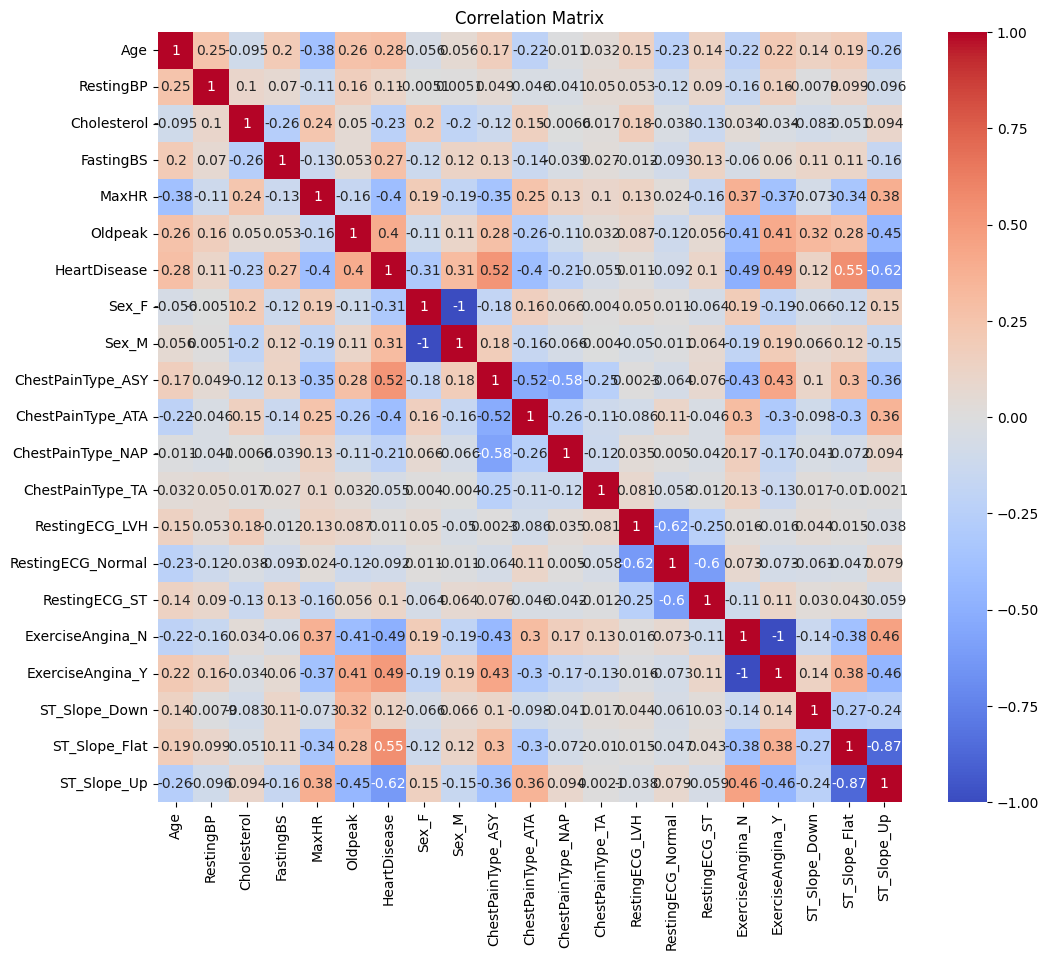

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [10]:
threshold = 0.5
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
             for x, y in zip(*high_corr) if x != y]
print("\nHigh Correlations (>0.5):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} - {feat2}: {corr:.3f}")


High Correlations (>0.5):
HeartDisease - ChestPainType_ASY: 0.517
HeartDisease - ST_Slope_Flat: 0.554
HeartDisease - ST_Slope_Up: -0.622
Sex_F - Sex_M: -1.000
Sex_M - Sex_F: -1.000
ChestPainType_ASY - HeartDisease: 0.517
ChestPainType_ASY - ChestPainType_ATA: -0.522
ChestPainType_ASY - ChestPainType_NAP: -0.578
ChestPainType_ATA - ChestPainType_ASY: -0.522
ChestPainType_NAP - ChestPainType_ASY: -0.578
RestingECG_LVH - RestingECG_Normal: -0.623
RestingECG_Normal - RestingECG_LVH: -0.623
RestingECG_Normal - RestingECG_ST: -0.602
RestingECG_ST - RestingECG_Normal: -0.602
ExerciseAngina_N - ExerciseAngina_Y: -1.000
ExerciseAngina_Y - ExerciseAngina_N: -1.000
ST_Slope_Flat - HeartDisease: 0.554
ST_Slope_Flat - ST_Slope_Up: -0.871
ST_Slope_Up - HeartDisease: -0.622
ST_Slope_Up - ST_Slope_Flat: -0.871


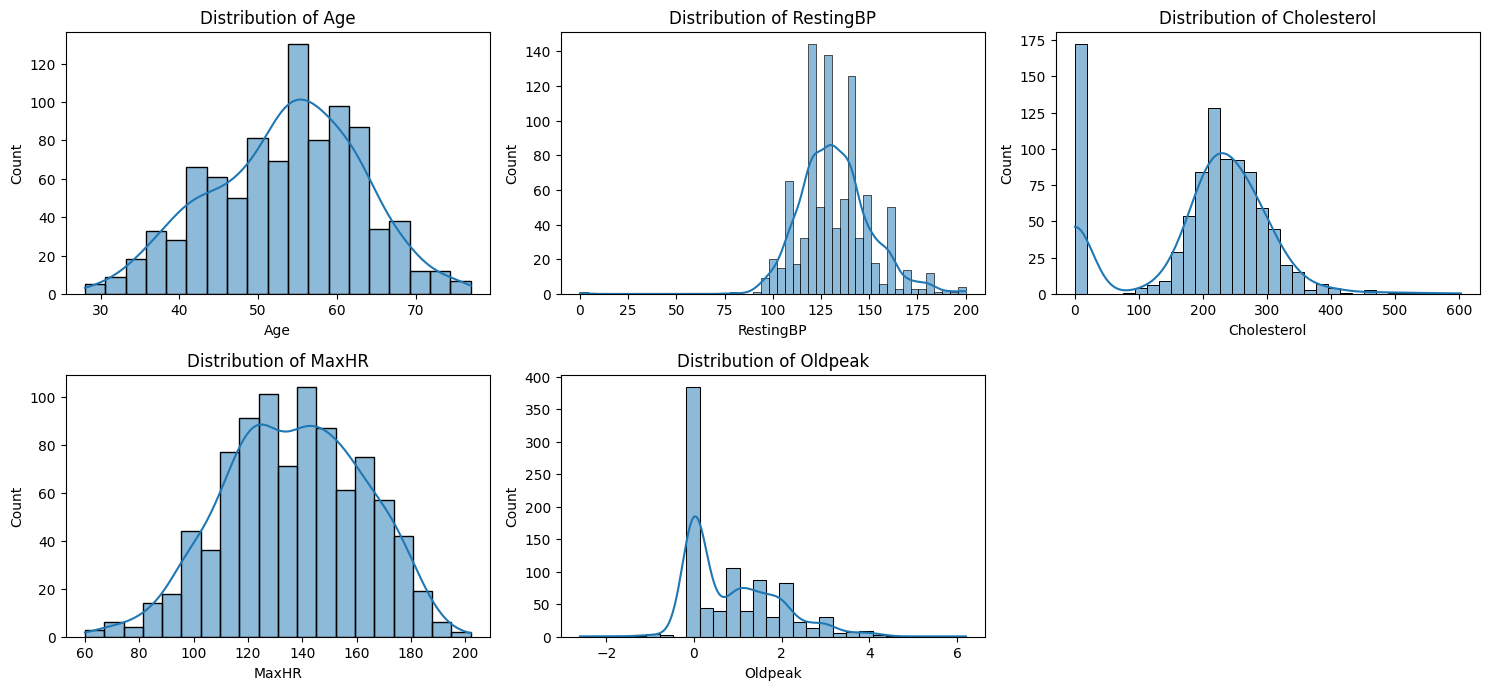

In [11]:
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if len(
    df_encoded[col].unique()) > 2]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_encoded, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Training the data with the z-score scaling


In [12]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData Split and Scaling Complete:")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")


Data Split and Scaling Complete:
Training set shape: (642, 20)
Testing set shape: (276, 20)


In [14]:
# testing the z-score scaling
import numpy as np

means = np.mean(X_test, axis=0)
stds = np.std(X_train, axis=0)

print("Means of each column (should be close to 0):", means)


print("Standard deviations of each column (should be 1):", stds)

Means of each column (should be close to 0): Age                   53.297101
RestingBP            131.047101
Cholesterol          189.891304
FastingBS              0.271739
MaxHR                136.561594
Oldpeak                0.844203
Sex_F                  0.166667
Sex_M                  0.833333
ChestPainType_ASY      0.514493
ChestPainType_ATA      0.177536
ChestPainType_NAP      0.239130
ChestPainType_TA       0.068841
RestingECG_LVH         0.206522
RestingECG_Normal      0.605072
RestingECG_ST          0.188406
ExerciseAngina_N       0.605072
ExerciseAngina_Y       0.394928
ST_Slope_Down          0.086957
ST_Slope_Flat          0.474638
ST_Slope_Up            0.438406
dtype: float64
Standard deviations of each column (should be 1): Age                    9.462149
RestingBP             18.606545
Cholesterol          106.345304
FastingBS              0.411866
MaxHR                 24.637100
Oldpeak                1.104816
Sex_F                  0.420171
Sex_M                  0.4

# Profiling

In [15]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Heart Disease")
profile.to_notebook_iframe()
profile.to_file("heart.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, roc_curve, auc, 
                             roc_auc_score)
from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
#? Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb_pred = gnb.predict(X_test_scaled)


In [18]:
#? KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)


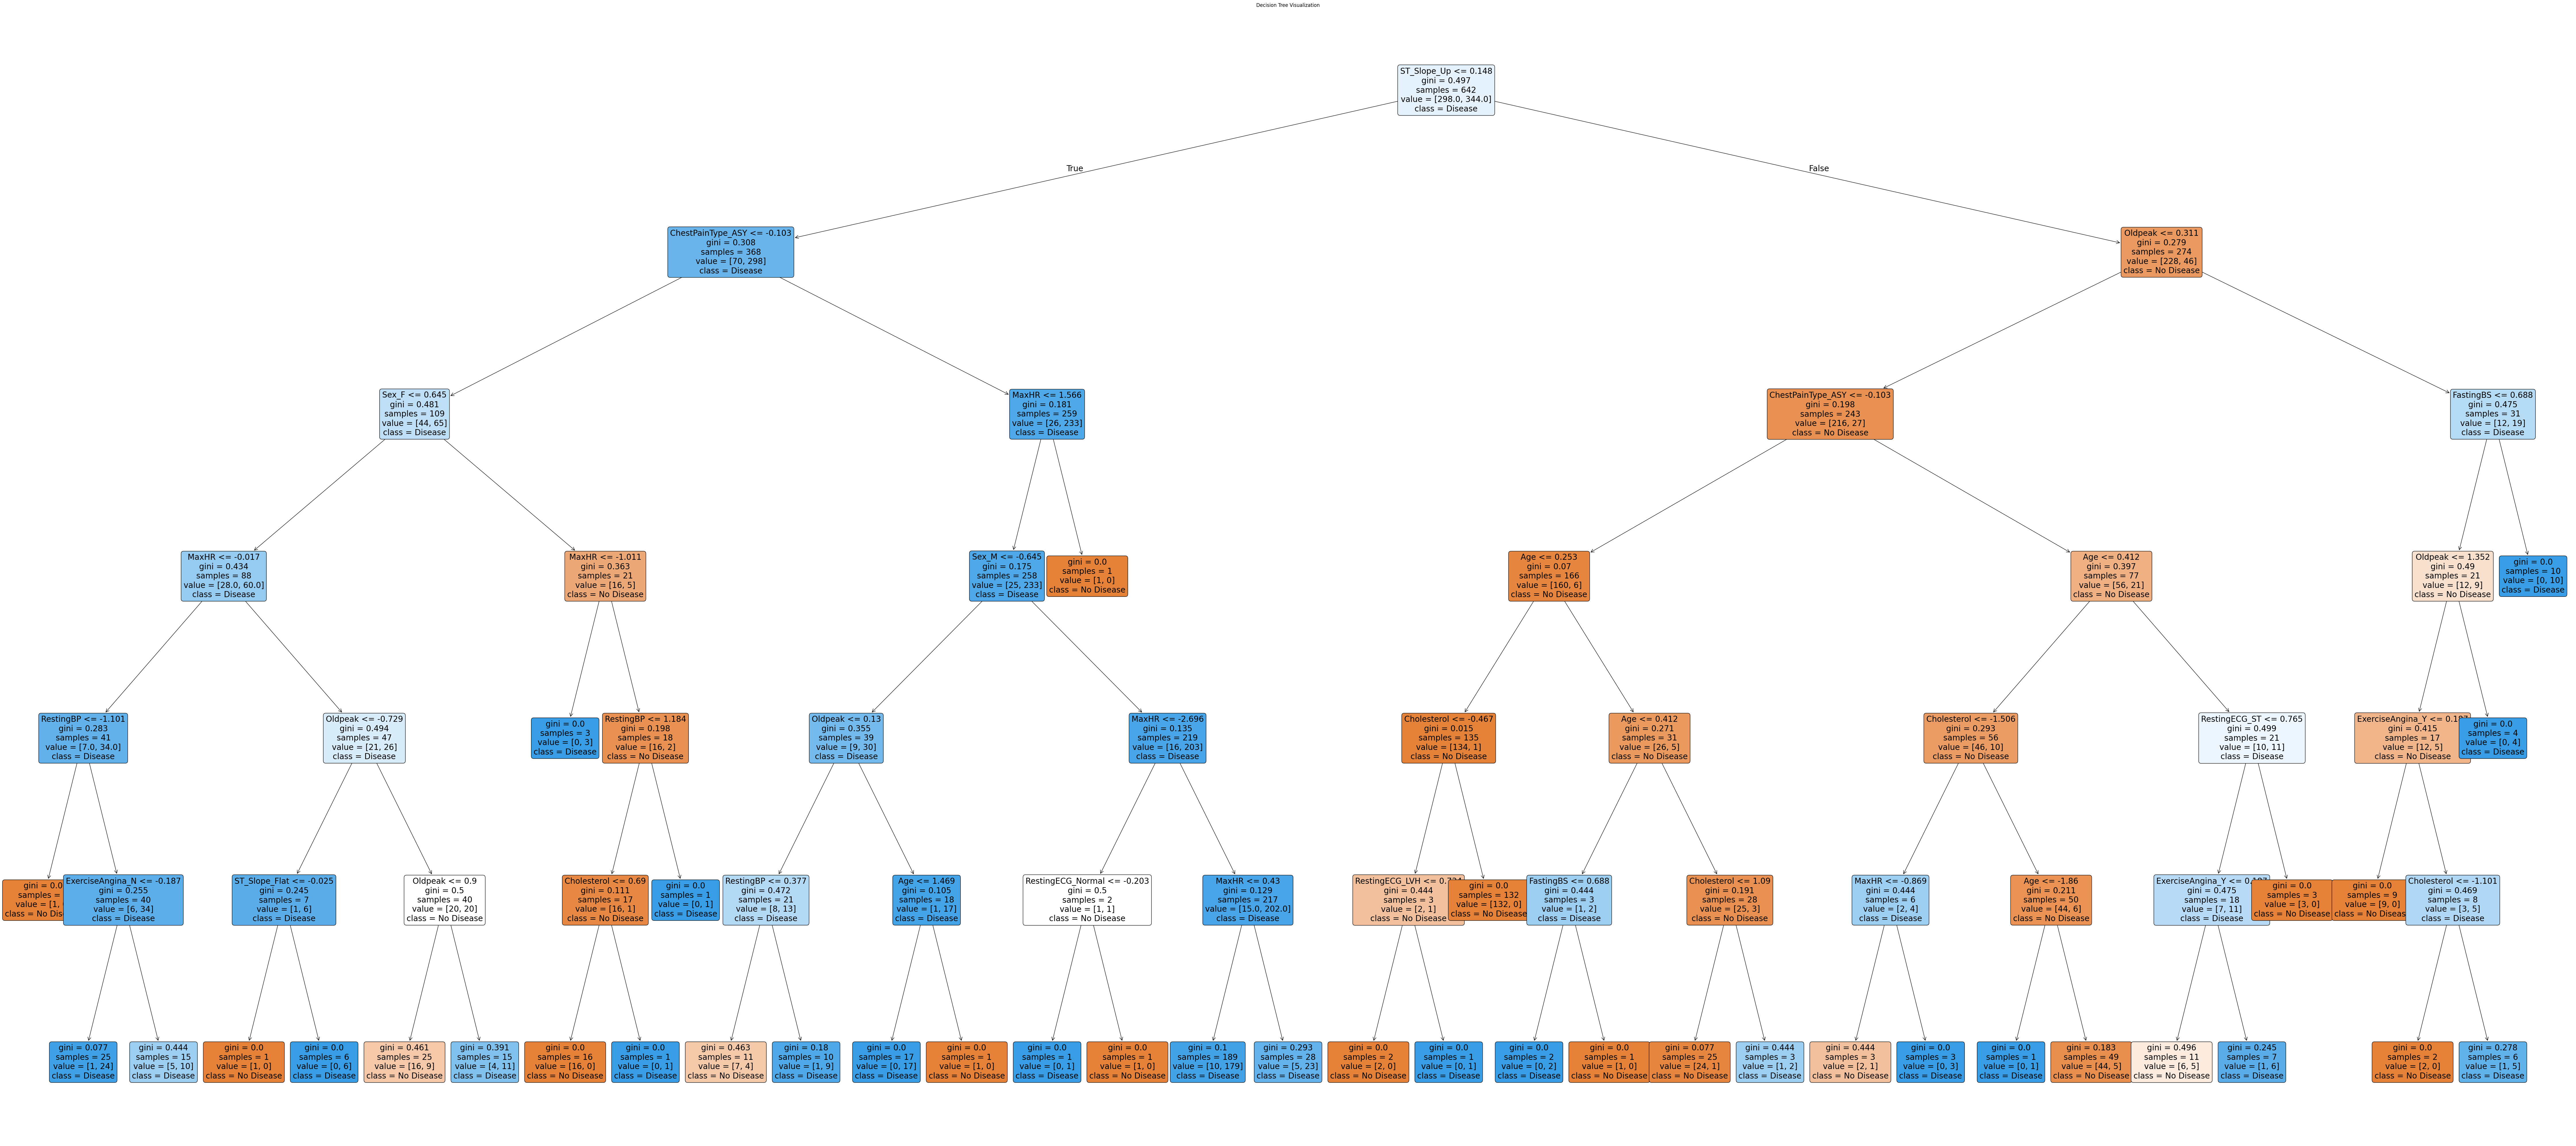

In [19]:
#? Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# 2. Visualize Decision Tree
plt.figure(figsize=(90,40))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          filled=True, rounded=True, fontsize=20)
plt.title('Decision Tree Visualization')
plt.tight_layout()
plt.savefig("decision_tree.png")
plt.show()


# SVM FROM SCRATCH

In [20]:

#! Convert y_train to numpy array and modify to be -1 and 1 cuz the SVM works with -1 and 1 not 0 and 1
y_train_svm = y_train.values * 2 - 1
y_test_svm = y_test.values * 2 - 1

class SimpleSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            for idx in range(n_samples):
                x_i = X[idx]
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]
    
    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

#! Fit SVM
svm = SimpleSVM()
svm.fit(X_train_scaled, y_train_svm)

#! Predict
svm_pred = svm.predict(X_test_scaled)

#! Convert predictions back to 0 and 1
svm_pred_binary = (svm_pred + 1) // 2

# Evaluation with confusion_matrix
[[TN, FP],  
 [FN, TP]]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

models = {'GaussianNB': gnb_pred, 'KNN': knn_pred,
          'DecisionTree': dt_pred, 'SVM': svm_pred_binary}

for model, pred in models.items():
    print(f"{model} Classification Report:")
    # ? Use zero_division=1 to handle undefined precision/recall when there are no predicted samples for a class
    print(classification_report(y_test, pred, zero_division=1))
    print(f"{model} Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\n")

GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.93      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276

GaussianNB Confusion Matrix:
[[101  11]
 [ 21 143]]


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       112
           1       0.93      0.80      0.86       164

    accuracy                           0.85       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.85      0.85       276

KNN Confusion Matrix:
[[102  10]
 [ 32 132]]


DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.76       112
           1       0.85      0.78      

# Evaluation With Receiver Operating Characteristic

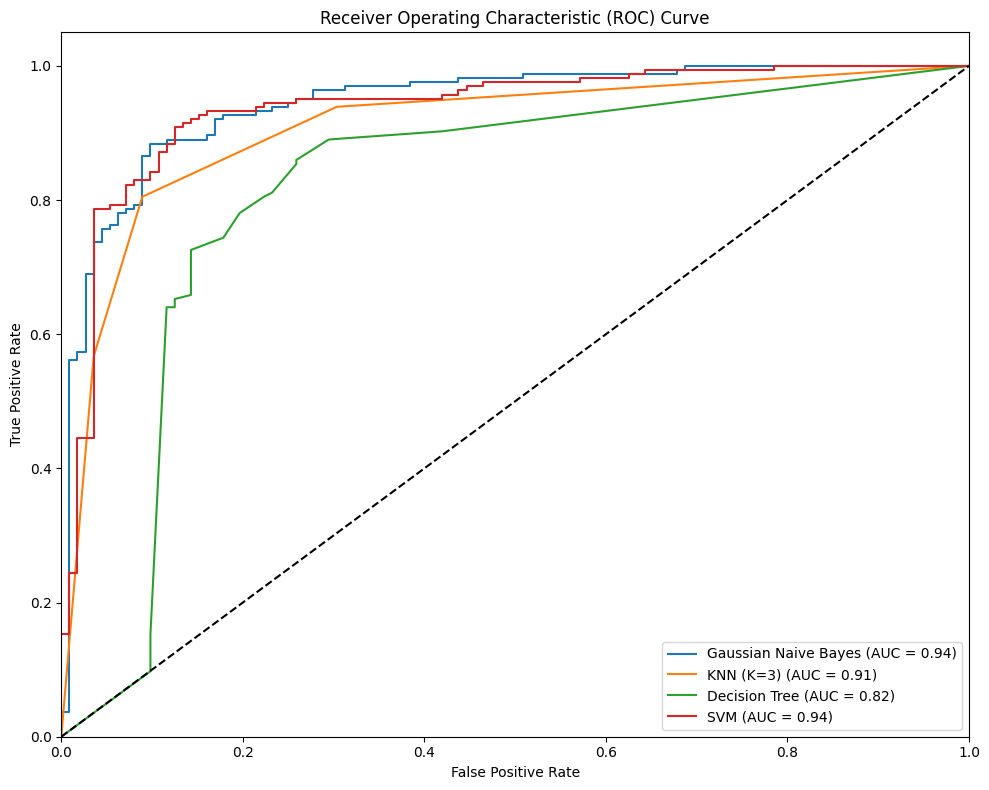

In [22]:

#!ROC Curves
plt.figure(figsize=(10,8))

models_roc = {
    'Gaussian Naive Bayes': gnb.predict_proba(X_test_scaled)[:, 1],
    'KNN (K=3)': knn.predict_proba(X_test_scaled)[:, 1],
    'Decision Tree': dt.predict_proba(X_test_scaled)[:, 1]
}

from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
models_roc['SVM'] = svc.predict_proba(X_test_scaled)[:, 1]

for name, y_score in models_roc.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# AUC : is the Area Under Cover

# Recommended Evaluation Metric:
For this medical classification:
1. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)
- Handles class imbalance
- Provides a comprehensive view of model performance
1. F1-Score
- Balances precision and recall

In [23]:
best_model = svc
third_sample = X_test_scaled[2].reshape(1, -1)
prediction = best_model.predict(third_sample)
prediction_proba = best_model.predict_proba(third_sample)

print("\nThird Sample Prediction:")
print(f"Predicted Class: {'Disease' if prediction[0] == 1 else 'No Disease'}")
print(f"Probability of Disease: {prediction_proba[0][1]:.2f}")


Third Sample Prediction:
Predicted Class: Disease
Probability of Disease: 0.90


# Cross-validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

#? AUC-ROC Evaluation
cv_roc_auc_scores = cross_val_score(
    best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"ROC AUC Scores: {cv_roc_auc_scores}")
print(f"Mean ROC AUC: {cv_roc_auc_scores.mean():.4f}")
print(f"Standard Deviation of ROC AUC: {cv_roc_auc_scores.std():.4f}")
print("\n"*2)

#? F1-Score Evaluation
f1_scorer = make_scorer(f1_score)
cv_f1_scores = cross_val_score(
    best_model, X_train_scaled, y_train, cv=5, scoring=f1_scorer)
print(f"F1 Scores: {cv_f1_scores}")
print(f"Mean F1-Score: {cv_f1_scores.mean():.4f}")
print(f"Standard Deviation of F1-Score: {cv_f1_scores.std():.4f}")

ROC AUC Scores: [0.92342995 0.93236715 0.91156964 0.88725129 0.89142157]
Mean ROC AUC: 0.9092
Standard Deviation of ROC AUC: 0.0176



F1 Scores: [0.86567164 0.89041096 0.86330935 0.8590604  0.84931507]
Mean F1-Score: 0.8656
Standard Deviation of F1-Score: 0.0136


In [26]:
import dagshub
dagshub.init(repo_owner='zinou123viva',
             repo_name='mlflow_dagshub', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=e502c196-bf80-49bb-aa7e-d7615b4f38a3&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=25e394b426805caa5e796fd24675dea5bfe1cb28a7517fe9739e16c6f399be94




Accessing as zinou123viva

Initialized MLflow to track repo "zinou123viva/mlflow_dagshub"

Repository zinou123viva/mlflow_dagshub initialized!

In [27]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import os
# Initialize MLflow Experiment
mlflow.set_experiment("Classification Models Comparison final")

# ! publishing to local uri
# mlflow.set_tracking_uri("http://localhost:5000")
# ! publishing to centralize dagshubs server 
mlflow.set_tracking_uri("https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow")

# os.environ["MLFLOW_TRACKING_URI"] = "https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow"
# os.environ["MLFLOW_TRACKING_USERNAME"] = "http://localhost:5000"
# os.environ["MLFLOW_TRACKING_PASSWORD"] = "http://localhost:5000"

# Function to register the models


def register_model(run_id, model_name):
    model_uri = f"runs:/{run_id}/{model_name}"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    print(f"Model registered: {result.name}, Version: {result.version}")

# Log dataset as artifact


def log_dataset(dataset, name):
    dataset_path = f"{name}.csv"
    dataset.to_csv(dataset_path, index=False)
    mlflow.log_artifact(dataset_path)


# Ensure there is no active run before starting
if mlflow.active_run():
    mlflow.end_run()

# Store model run information
model_runs = {}

# Train and Evaluate Models with MLflow Logging
models_predictions = {
    "GaussianNB": (gnb, gnb_pred),
    "KNN": (knn, knn_pred),
    "DecisionTree": (dt, dt_pred),
    "SVM": (svc, svm_pred_binary),
}

for model_name, (model, predictions) in models_predictions.items():
    with mlflow.start_run(run_name=model_name, nested=True) as run:
        # Log the dataset
        log_dataset(X_train, "X_train")
        log_dataset(y_train, "y_train")
        log_dataset(X_test, "X_test")
        log_dataset(y_test, "y_test")

        # Log the model name as a parameter
        mlflow.log_param("model_name", model_name)

        # Log model-specific parameters
        if model_name == "KNN":
            mlflow.log_param("n_neighbors", model.n_neighbors)
        elif model_name == "DecisionTree":
            mlflow.log_param("max_depth", model.max_depth)
        elif model_name == "SVM":
            mlflow.log_param("learning_rate", svm.learning_rate)
            mlflow.log_param("lambda_param", svm.lambda_param)
            mlflow.log_param("epochs", svm.epochs)

        # Log Metrics
        report = classification_report(
            y_test, predictions, output_dict=True, zero_division=1)
        for metric, value in report["weighted avg"].items():
            mlflow.log_metric(f"weighted_{metric}", value)

        # Confusion Matrix
        cm = confusion_matrix(y_test, predictions)
        mlflow.log_metric("True Negative", cm[0, 0])
        mlflow.log_metric("False Positive", cm[0, 1])
        mlflow.log_metric("False Negative", cm[1, 0])
        mlflow.log_metric("True Positive", cm[1, 1])

        
        mlflow.sklearn.log_model(model, model_name)
        

        # Log Artifacts (e.g., Decision Tree Visualization)
        if model_name == "DecisionTree":
            plt.figure(figsize=(90, 40))
            plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Disease'],
                      filled=True, rounded=True, fontsize=20)
            plt.title('Decision Tree Visualization')
            plt.tight_layout()
            plt.savefig("decision_tree.png")
            mlflow.log_artifact("decision_tree.png")
            plt.close()

        # Save run information for later registration
        model_runs[model_name] = run.info.run_id

# Register the models after logging
for model_name, run_id in model_runs.items():
    register_model(run_id, model_name)

# Ensure to close any active run
if mlflow.active_run():
    mlflow.end_run()

2024/12/08 20:34:56 INFO mlflow.tracking.fluent: Experiment with name 'Classification Models Comparison final' does not exist. Creating a new experiment.
2024/12/08 20:35:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GaussianNB at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0/runs/61b8612cf04a4b6b80f14cb542858b2c
🧪 View experiment at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0


2024/12/08 20:35:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNN at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0/runs/268a20d3d6064ed99d03c9850e7c85ff
🧪 View experiment at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0


2024/12/08 20:35:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTree at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0/runs/8023b74f28a34b3da7908337e2020310
🧪 View experiment at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0


2024/12/08 20:36:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0/runs/c960222ce16041fd9bcf119f1564ba10
🧪 View experiment at: https://dagshub.com/zinou123viva/mlflow_dagshub.mlflow/#/experiments/0


Successfully registered model 'GaussianNB'.
2024/12/08 20:36:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: GaussianNB, version 1
Created version '1' of model 'GaussianNB'.


Model registered: GaussianNB, Version: 1


Successfully registered model 'KNN'.
2024/12/08 20:36:40 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN, version 1
Created version '1' of model 'KNN'.


Model registered: KNN, Version: 1


Successfully registered model 'DecisionTree'.
2024/12/08 20:36:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTree, version 1
Created version '1' of model 'DecisionTree'.


Model registered: DecisionTree, Version: 1


Successfully registered model 'SVM'.
2024/12/08 20:36:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM, version 1


Model registered: SVM, Version: 1


Created version '1' of model 'SVM'.


# Loading model

In [30]:
model_name = "SVM"
model_version = 1
# model_uri = f"models:/{model_name}/{model_version}"
model_uri = f"models:/{model_name}@theupcoming"

loaded_model = mlflow.sklearn.load_model(model_uri)
y_pred = loaded_model.predict(X_test)
y_pred[:4]

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1], dtype=int64)